In [1]:
import pandas as pd
import geopandas as gpd
print('Pandas version: ', pd.__version__)
print('Geopandas version: ', gpd.__version__)

Pandas version:  1.4.3
Geopandas version:  0.11.0


In [5]:
df = pd.read_csv(f'./LOCATION_BASE_DATA.csv')
print(type(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313488 entries, 0 to 313487
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   CODEBASE   313488 non-null  object
 1   DAY_NIGHT  313488 non-null  object
 2   CNT        313488 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ MB


In [14]:
df1 = df.iloc[0:156744]
df1

,CODEBASE,DAY_NIGHT,CNT
0,A6813-0111-00,D,6
1,A6813-0110-00,D,32
2,A6813-0109-00,D,20
3,A6813-0108-00,D,22
4,A6813-0107-00,D,25
...,...,...,...
156739,A0201-0005-00,D,34
156740,A0201-0004-00,D,566
156741,A0201-0003-00,D,480
156742,A0201-0002-00,D,475


In [12]:
df2 = df.iloc[156744:]
df2

,CODEBASE,DAY_NIGHT,CNT
156744,A6813-0111-00,N,81
156745,A6813-0110-00,N,55
156746,A6813-0109-00,N,46
156747,A6813-0108-00,N,98
156748,A6813-0107-00,N,53
...,...,...,...
313483,A0201-0005-00,N,62
313484,A0201-0004-00,N,19
313485,A0201-0003-00,N,145
313486,A0201-0002-00,N,3


In [15]:
df1.query('CODEBASE == "A6813-0111-00"')

,CODEBASE,DAY_NIGHT,CNT
0,A6813-0111-00,D,6


In [16]:
df1.CNT.describe()

count    156744.000000
mean        151.086855
std         362.319035
min           0.000000
25%           7.000000
50%          47.000000
75%         173.000000
max       18499.000000
Name: CNT, dtype: float64

In [43]:
df3 = pd.merge(df1, df2,left_on='CODEBASE', right_on='CODEBASE')
df3['CODEBASE'] = df3['CODEBASE'].str[0:10]
df3

,CODEBASE,DAY_NIGHT_x,CNT_x,DAY_NIGHT_y,CNT_y
0,A6813-0111,D,6,N,81
1,A6813-0110,D,32,N,55
2,A6813-0109,D,20,N,46
3,A6813-0108,D,22,N,98
4,A6813-0107,D,25,N,53
...,...,...,...,...,...
156739,A0201-0005,D,34,N,62
156740,A0201-0004,D,566,N,19
156741,A0201-0003,D,480,N,145
156742,A0201-0002,D,475,N,3


In [44]:
df3.to_csv('LBD.csv')

In [59]:
gf = gpd.read_file(f'./secondary_release_area/G97_63000_U0202_2015.shp')
print(type(gf))
gf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CODE2      907 non-null    object  
 1   TOWN_ID    907 non-null    object  
 2   TOWN       907 non-null    object  
 3   COUNTY_ID  907 non-null    object  
 4   COUNTY     907 non-null    object  
 5   U_ID       907 non-null    int64   
 6   AREA       907 non-null    float64 
 7   X          907 non-null    float64 
 8   Y          907 non-null    float64 
 9   geometry   907 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 71.0+ KB


In [60]:
print(type(gf))
gf.crs

<class 'geopandas.geodataframe.GeoDataFrame'>


<Derived Projected CRS: EPSG:3826>
Name: TWD97 / TM2 zone 121
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Taiwan, Republic of China - between 120°E and 122°E, onshore and offshore - Taiwan Island.
- bounds: (119.99, 20.41, 122.06, 26.72)
Coordinate Operation:
- name: Taiwan 2-degree TM zone 121
- method: Transverse Mercator
Datum: Taiwan Datum 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

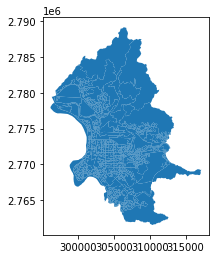

In [62]:
gf.plot()

In [63]:
gf

,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,U_ID,AREA,X,Y,geometry
0,A6307-49,63000070,萬華區,63000,臺北市,8030,45192.3475,300616.5314,2.768631e+06,"POLYGON Z ((300566.807 2768736.586 0.000, 3005..."
1,A6307-50,63000070,萬華區,63000,臺北市,8031,23374.0335,301306.3694,2.768613e+06,"POLYGON Z ((301368.508 2768469.371 0.000, 3013..."
2,A6307-51,63000070,萬華區,63000,臺北市,8032,55970.8940,299682.3157,2.768561e+06,"POLYGON Z ((299612.321 2768390.814 0.000, 2996..."
3,A6307-52,63000070,萬華區,63000,臺北市,8033,42502.0535,301489.1122,2.768526e+06,"POLYGON Z ((301346.821 2768415.862 0.000, 3013..."
4,A6307-53,63000070,萬華區,63000,臺北市,8034,58070.4139,299822.5776,2.768472e+06,"POLYGON Z ((299877.221 2768576.558 0.000, 2998..."
...,...,...,...,...,...,...,...,...,...,...
902,A6311-86,63000110,士林區,63000,臺北市,8351,35859.0741,302279.5338,2.775226e+06,"POLYGON Z ((302178.644 2775330.533 0.000, 3022..."
903,A6311-87,63000110,士林區,63000,臺北市,8352,47087.8486,302582.6669,2.775213e+06,"POLYGON Z ((302664.820 2775264.350 0.000, 3026..."
904,A6311-88,63000110,士林區,63000,臺北市,8353,39345.0806,302150.7632,2.775133e+06,"POLYGON Z ((302126.171 2775317.172 0.000, 3021..."
905,A6311-89,63000110,士林區,63000,臺北市,8354,120823.0105,301703.0634,2.775071e+06,"POLYGON Z ((301899.830 2774758.581 0.000, 3019..."


In [99]:
gf['CODE2'] = gf['CODE2'].str.slice_replace(5, 6, '-00')

In [102]:
gf['CODE2'] = gf['CODE2'].str.replace('-00A', '-010')

In [104]:
gf.query('CODE2 == "A6303-0101"')

,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,U_ID,AREA,X,Y,geometry
352,A6303-0101,63000030,大安區,63000,臺北市,7795,57860.5734,306172.7795,2.768005e+06,"POLYGON Z ((306352.397 2767940.951 0.000, 3063..."


In [105]:
gf1 = gf.merge(df3,left_on='CODE2', right_on='CODEBASE')
gf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CODE2        907 non-null    object  
 1   TOWN_ID      907 non-null    object  
 2   TOWN         907 non-null    object  
 3   COUNTY_ID    907 non-null    object  
 4   COUNTY       907 non-null    object  
 5   U_ID         907 non-null    int64   
 6   AREA         907 non-null    float64 
 7   X            907 non-null    float64 
 8   Y            907 non-null    float64 
 9   geometry     907 non-null    geometry
 10  CODEBASE     907 non-null    object  
 11  DAY_NIGHT_x  907 non-null    object  
 12  CNT_x        907 non-null    int64   
 13  DAY_NIGHT_y  907 non-null    object  
 14  CNT_y        907 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(8)
memory usage: 113.4+ KB


<AxesSubplot:>

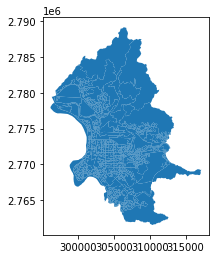

In [106]:
gf1.plot()

In [110]:
gf1

,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,U_ID,AREA,X,Y,geometry,CODEBASE,DAY_NIGHT_x,CNT_x,DAY_NIGHT_y,CNT_y
0,A6307-0049,63000070,萬華區,63000,臺北市,8030,45192.3475,300616.5314,2.768631e+06,"POLYGON Z ((300566.807 2768736.586 0.000, 3005...",A6307-0049,D,255,N,144
1,A6307-0050,63000070,萬華區,63000,臺北市,8031,23374.0335,301306.3694,2.768613e+06,"POLYGON Z ((301368.508 2768469.371 0.000, 3013...",A6307-0050,D,39,N,70
2,A6307-0051,63000070,萬華區,63000,臺北市,8032,55970.8940,299682.3157,2.768561e+06,"POLYGON Z ((299612.321 2768390.814 0.000, 2996...",A6307-0051,D,359,N,72
3,A6307-0052,63000070,萬華區,63000,臺北市,8033,42502.0535,301489.1122,2.768526e+06,"POLYGON Z ((301346.821 2768415.862 0.000, 3013...",A6307-0052,D,172,N,85
4,A6307-0053,63000070,萬華區,63000,臺北市,8034,58070.4139,299822.5776,2.768472e+06,"POLYGON Z ((299877.221 2768576.558 0.000, 2998...",A6307-0053,D,283,N,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,A6311-0086,63000110,士林區,63000,臺北市,8351,35859.0741,302279.5338,2.775226e+06,"POLYGON Z ((302178.644 2775330.533 0.000, 3022...",A6311-0086,D,28,N,229
903,A6311-0087,63000110,士林區,63000,臺北市,8352,47087.8486,302582.6669,2.775213e+06,"POLYGON Z ((302664.820 2775264.350 0.000, 3026...",A6311-0087,D,10,N,197
904,A6311-0088,63000110,士林區,63000,臺北市,8353,39345.0806,302150.7632,2.775133e+06,"POLYGON Z ((302126.171 2775317.172 0.000, 3021...",A6311-0088,D,260,N,390
905,A6311-0089,63000110,士林區,63000,臺北市,8354,120823.0105,301703.0634,2.775071e+06,"POLYGON Z ((301899.830 2774758.581 0.000, 3019...",A6311-0089,D,7,N,263


In [111]:
gf711 = gpd.read_file(f'./7-11.shp')
print(type(gf711))
gf711.info()

DriverError: unsupported driver: 'KML'